# Hands-On Tutorial 3: Neural Networks
Today we will learn how to implement basic Neural Networks followed by Concurrent and Recurrent Neural Networks.

# 1. PyTorch Fundamentals

Before getting into Neural Networks, we will first go through some PyTorch fundamentals.


In [ ]:
# Importing PyTorch and checking its version

import torch
torch.__version__

'2.5.1+cu124'

Tensors are the fundamental building blocks of machine learning. They represent data in a numerical way.


In [ ]:
# --- Scalars, Vectors, Matrices, and Tensors ---
# Scalar (0-dimensional tensor)
scalar = torch.tensor(7)
print("Scalar:", scalar)
print("Type:", scalar.dtype)
print("Dimensions:", scalar.ndim)
print("Scalar number:", scalar.item())

# Vector (1-dimensional tensor)
vector = torch.tensor([1, 2, 3])
print("\nVector:", vector)
print("Shape:", vector.shape)

# Matrix (2-dimensional tensor)
matrix = torch.tensor([[1, 2], [3, 4]])
print("\nMatrix:\n", matrix)
print("Shape:", matrix.shape)

# Higher-dimensional tensor (3-dimensional) with random person
tensor3d = torch.rand(size=(2, 3, 4))
print("\n3D Random Tensor:", tensor3d)
print("\n3D Tensor shape:", tensor3d.shape)

# --- Useful Functions ---
# Create a tensor filled with zeros
zeros = torch.zeros(size=(3, 4))
print("\nZeros Tensor:\n", zeros)

# Create a tensor filled with ones
ones = torch.ones(size=(3, 4))
print("\nOnes Tensor:\n", ones)

# Create a tensor with a range of values
range_tensor = torch.arange(start=0, end=10, step=1)
print("\nRange Tensor:", range_tensor)


Scalar: tensor(7)
Type: torch.int64
Dimensions: 0
Scalar number: 7

Vector: tensor([1, 2, 3])
Shape: torch.Size([3])

Matrix:
 tensor([[1, 2],
        [3, 4]])
Shape: torch.Size([2, 2])

3D Random Tensor: tensor([[[0.7791, 0.6410, 0.5443, 0.2704],
         [0.1402, 0.6695, 0.5302, 0.4365],
         [0.5858, 0.3472, 0.3586, 0.3322]],

        [[0.2408, 0.8108, 0.4639, 0.6995],
         [0.9217, 0.1459, 0.7109, 0.6278],
         [0.6940, 0.8542, 0.9859, 0.9454]]])

3D Tensor shape: torch.Size([2, 3, 4])

Zeros Tensor:
 tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

Ones Tensor:
 tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

Range Tensor: tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


### Basic Operations with tensors


In [ ]:
# Create a tensor from a list
a = torch.tensor([1, 2, 3])
print("Tensor a:", a)

# Addition
b = a + 5
print("a + 5:", b)

# Matrix multiplication
w = torch.rand(2, 3)
x = torch.rand(3, 4)
y = torch.mm(w, x)
z = torch.matmul(w, x)
print("Matrix multiplication result (x * y):\n", y)
print("Matrix multiplication result (x * y):\n", z)

# Element-wise multiplication
e = a.float() * 2.0  # Convert to float for multiplication with a float scalar
print("Element-wise multiplication:", e)

Tensor a: tensor([1, 2, 3])
a + 5: tensor([6, 7, 8])
Matrix multiplication result (x * y):
 tensor([[0.5304, 0.6219, 0.3597, 0.4984],
        [1.3036, 1.5438, 0.5859, 1.2313]])
Matrix multiplication result (x * y):
 tensor([[0.5304, 0.6219, 0.3597, 0.4984],
        [1.3036, 1.5438, 0.5859, 1.2313]])
Element-wise multiplication: tensor([2., 4., 6.])


# 2. Building Neural Network with PyTorch

We will build and run a simple neural network for a classification problem.

Below is the basic architecture for any neural network model.
1. Input layer shape
2. Hidden layers
3. Neurons per hidden layer
4. Output layer shape
5. Hidden activation layer
6. Output activation
7. Loss function
8. Optimizer


In [ ]:
# First step is that we require the data we want to work on - so we create two circles with different coloured dots.
from sklearn.datasets import make_circles


# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03, # a little bit of noise to the dots
                    random_state=42) # keep random state so we get the same values


#Lets view the first 5 values of X and y
print(f"First 5 X features:\n{X[:5]}")
print(f"\nFirst 5 y labels:\n{y[:5]}")

First 5 X features:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

First 5 y labels:
[1 1 1 1 0]


In [ ]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
    "X2": X[:, 1],
    "label": y
})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [ ]:
# Check different labels
circles.label.value_counts()

,count
label,
1,500
0,500


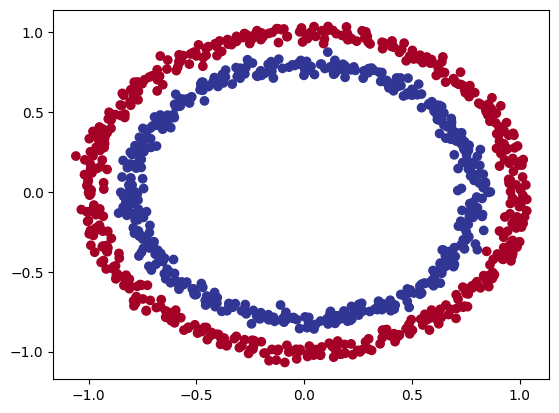

In [ ]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

In [ ]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]
print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


In [ ]:
# Turn data into tensors
# Otherwise this causes issues with computations later on
import torch
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# View the first five samples
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=42) # make the random split reproducible

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [ ]:
# Standard PyTorch imports
from torch import nn # nn contains all of PyTorch's building blocks for neural networks

# Make device agnostic code (Setting up the device)
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
# Construct a model class that subclasses nn.Module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # Create 2 nn.Linear layers capable of handling X and y input and output shapes
        self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features (X), produces 5 features
        self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features, produces 1 feature (y)

    # Define a forward method containing the forward pass computation
    def forward(self, x):
        # Return the output of layer_2, a single feature, the same shape as y
        return self.layer_2(self.layer_1(x)) # computation goes through layer_1 first then the output of layer_1 goes through layer_2

# Create an instance of the model and send it to target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

####The hidden units that you can use in neural network is a hypermparameter which a value that you can set yourself.

####You can perform forward pass computation using nn.Sequential as well that performs a forward pass computation of the input data thorugh the layers in the order that they appear.

In [ ]:
# Replicate CircleModelV0 with nn.Sequential
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

#### The above looks much easier than the other than nn.module then why don't we always use nn.Sequential ?

<details>
<summary>Show Answer</summary>

nn.Sequential is fantastic for straight-forward computations, however, as the namespace says, it always runs in sequential order.

So if you'd like something else to happen (rather than just straight-forward sequential computation) you'll want to define your own custom nn.Module subclass.

In [ ]:
# Make predictions with the model
untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200])

First 10 predictions:
tensor([[-0.2462],
        [-0.3431],
        [-0.0238],
        [-0.3091],
        [-0.0740],
        [-0.1328],
        [-0.3658],
        [-0.3167],
        [-0.0221],
        [-0.3501]], device='cuda:0', grad_fn=<SliceBackward0>)

First 10 test labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [ ]:
# Create a loss function
# loss_fn = nn.BCELoss() # BCELoss = no sigmoid built-in
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid built-in

# Create an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [ ]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

### $\text{Forward Pass}$
$$
\begin{aligned}
\text{Logits: } & \hat{y}_{\text{logits}} = f_{\theta}(X_{\text{train}}) \\
\text{Predictions: } & \hat{y}_{\text{pred}} = \mathbb{I}(\sigma(\hat{y}_{\text{logits}}) \geq 0.5) \\
& \text{Where } \sigma(z) = \frac{1}{1 + e^{-z}} \text{ (sigmoid)}
\end{aligned}
$$

### $\text{Loss Calculation}$
$$
\mathcal{L}_{\text{BCE}} = -\frac{1}{N}\sum_{i=1}^N \left[y^{(i)}\log(\sigma(\hat{y}_{\text{logits}}^{(i)})) + (1-y^{(i)})\log(1-\sigma(\hat{y}_{\text{logits}}^{(i)}))\right]
$$
*Using `BCEWithLogitsLoss` combines sigmoid and BCELoss for numerical stability*

### $\text{Backpropagation}$
$$
\frac{\partial \mathcal{L}}{\partial \theta} = \nabla_{\theta}\mathcal{L} \leftarrow \text{Autograd computes via chain rule}
$$
*Performed by `loss.backward()`*

### $\text{Parameter Update (SGD)}$
$$
\theta := \theta - \eta \nabla_{\theta}\mathcal{L}
$$
*Where $\eta$ is learning rate, implemented via `optimizer.step()`*



In [ ]:
# Training the model
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 100

device = "cuda" if torch.cuda.is_available() else "cpu"
device

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # Forward pass (model outputs raw logits)
    y_logits = model_0(X_train).squeeze() # squeeze to remove extra `1` dimensions, this won't work unless model and data are on same device
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labls

    # Calculate loss/accuracy
    # loss = loss_fn(torch.sigmoid(y_logits), # Using nn.BCELoss you need torch.sigmoid()
    #                y_train)
    loss = loss_fn(y_logits, # Using nn.BCEWithLogitsLoss works with raw logits
                   y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    #Optimizer zero grad
    optimizer.zero_grad()

    #Loss backwards - back propagation
    loss.backward()

    # Optimizer step, updating the gradients
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()
    with torch.inference_mode():
        # Forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.70002, Accuracy: 43.12% | Test loss: 0.69396, Test acc: 47.50%
Epoch: 10 | Loss: 0.69675, Accuracy: 47.38% | Test loss: 0.69152, Test acc: 52.50%
Epoch: 20 | Loss: 0.69558, Accuracy: 48.38% | Test loss: 0.69108, Test acc: 53.50%
Epoch: 30 | Loss: 0.69492, Accuracy: 48.88% | Test loss: 0.69112, Test acc: 53.00%
Epoch: 40 | Loss: 0.69447, Accuracy: 48.62% | Test loss: 0.69132, Test acc: 53.00%
Epoch: 50 | Loss: 0.69415, Accuracy: 48.62% | Test loss: 0.69156, Test acc: 54.00%
Epoch: 60 | Loss: 0.69390, Accuracy: 48.25% | Test loss: 0.69182, Test acc: 52.50%
Epoch: 70 | Loss: 0.69372, Accuracy: 48.62% | Test loss: 0.69207, Test acc: 50.50%
Epoch: 80 | Loss: 0.69357, Accuracy: 48.38% | Test loss: 0.69230, Test acc: 52.50%
Epoch: 90 | Loss: 0.69346, Accuracy: 49.25% | Test loss: 0.69252, Test acc: 50.00%


####What do you notice from the above results ?

<details>
<summary>Show Answer</summary>

The accuracy barely moves above 50% on each data split.

And because we're working with a balanced binary classification problem, it means our model is performing as good as random guessing (with 500 samples of class 0 and class 1 a model predicting class 1 every single time would achieve 50% accuracy.

In [ ]:
import gdown
from pathlib import Path

# Download helper_functions.py from Google Drive (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py from Google Drive")
  url = "https://drive.google.com/uc?id=1_chCGq-bmz3fC-MS96ng0J3BE6noYoqJ"
  gdown.download(url, "helper_functions.py", quiet=False)

from helper_functions import plot_predictions, plot_decision_boundary

Downloading...
From (original): https://drive.google.com/uc?id=1_chCGq-bmz3fC-MS96ng0J3BE6noYoqJ
From (redirected): https://drive.google.com/uc?id=1_chCGq-bmz3fC-MS96ng0J3BE6noYoqJ&confirm=t&uuid=c6982450-58f2-48a8-9948-f13a070724d4
To: /content/helper_functions.py
100%|██████████| 10.2k/10.2k [00:00<00:00, 19.1MB/s]


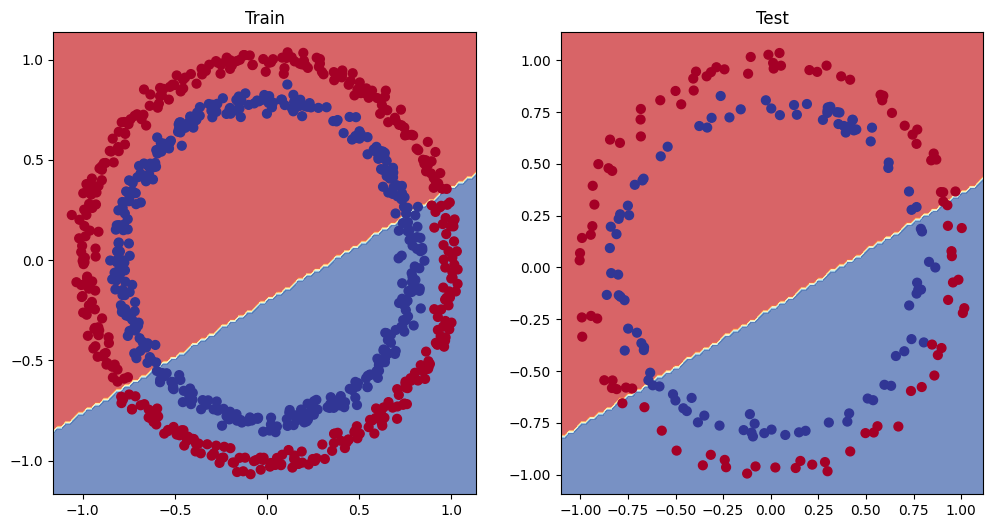

In [ ]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

#### Based on the above plots, what do you think is the issue?

<details>
<summary>Show Answer</summary>

That explains the 50% accuracy. Since our data is circular, drawing a straight line can at best cut it down the middle.

Our model is underfitting, meaning it's not learning predictive patterns from the data.

#3. Building the model with non-linear activation function

In [ ]:
# Build model with non-linear activation function
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        ### TODO ### Create 3 nn.linear layers with 10 features between the hidden nodes
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU() # <- add in ReLU activation function

    def forward(self, x):
      # Intersperse the ReLU activation function between layers
      ### TODO ### Update return with relu applied between each layer
       return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_1 = CircleModelV2().to(device)
print(model_1)

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


<details>
<summary>Show Answer</summary>

```python
self.layer_1 = nn.Linear(in_features=2, out_features=10)
self.layer_2 = nn.Linear(in_features=10, out_features=10)
self.layer_3 = nn.Linear(in_features=10, out_features=1)

return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))


In [ ]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.1)

In [ ]:
# Fit the model
torch.manual_seed(42)

epochs = 5000
train_loss_values = []
test_loss_values = []

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    # 1. Forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels

    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss calculates loss using logits
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_1.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_1(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calculate loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")
        train_loss_values.append(loss.item())
        test_loss_values.append(test_loss.item())

Epoch: 0 | Loss: 0.69295, Accuracy: 50.00% | Test Loss: 0.69319, Test Accuracy: 50.00%
Epoch: 100 | Loss: 0.69115, Accuracy: 52.88% | Test Loss: 0.69102, Test Accuracy: 52.50%
Epoch: 200 | Loss: 0.68977, Accuracy: 53.37% | Test Loss: 0.68940, Test Accuracy: 55.00%
Epoch: 300 | Loss: 0.68795, Accuracy: 53.00% | Test Loss: 0.68723, Test Accuracy: 56.00%
Epoch: 400 | Loss: 0.68517, Accuracy: 52.75% | Test Loss: 0.68411, Test Accuracy: 56.50%
Epoch: 500 | Loss: 0.68102, Accuracy: 52.75% | Test Loss: 0.67941, Test Accuracy: 56.50%
Epoch: 600 | Loss: 0.67515, Accuracy: 54.50% | Test Loss: 0.67285, Test Accuracy: 56.00%
Epoch: 700 | Loss: 0.66659, Accuracy: 58.38% | Test Loss: 0.66322, Test Accuracy: 59.00%
Epoch: 800 | Loss: 0.65160, Accuracy: 64.00% | Test Loss: 0.64757, Test Accuracy: 67.50%
Epoch: 900 | Loss: 0.62362, Accuracy: 74.00% | Test Loss: 0.62145, Test Accuracy: 79.00%
Epoch: 1000 | Loss: 0.56818, Accuracy: 87.75% | Test Loss: 0.57378, Test Accuracy: 86.50%
Epoch: 1100 | Loss: 0.

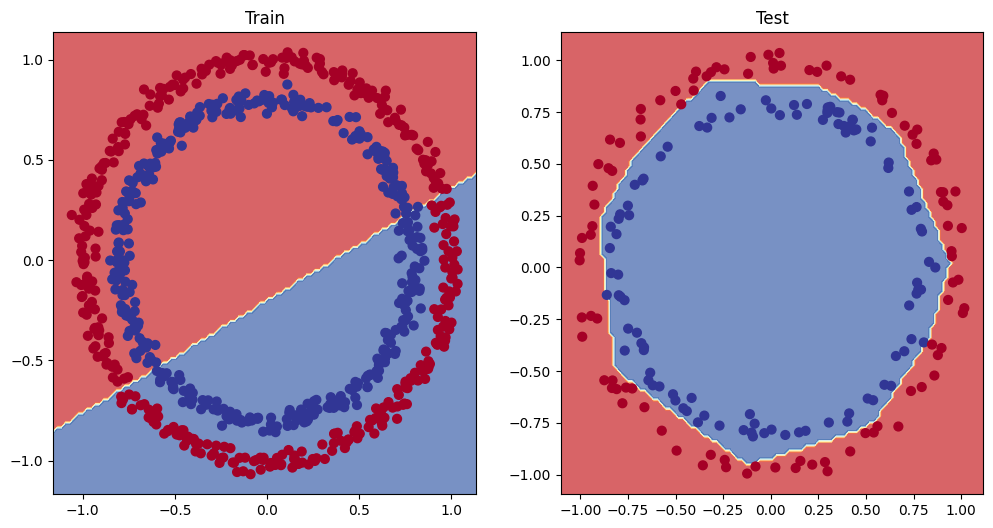

In [ ]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)  # model_0 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)  # model_1 = has non-linearity


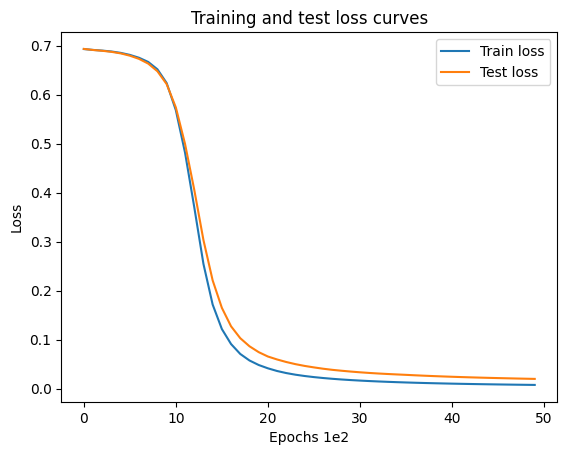

In [ ]:
# Plot the loss curves
epochs = list(range(50))
plt.plot(epochs, train_loss_values, label="Train loss")
plt.plot(epochs, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs 1e2")
plt.legend();

#4. Neural Networks and Computer Vision
Now we are going to implement neural networks in visual data using various computer vision libraies in pytorch.

In [ ]:
# Import torchvision
import torchvision # Contains datasets, model architectures and image transformations often used for computer vision problems.
from torchvision import datasets # This contains the example computer vision datasets
from torchvision.transforms import ToTensor


#### First we require the dataset. We will use the Fashion MNIST computer vision data. This contains images of 10 kinds of clothing items.

In [ ]:
# Setup training data
train_data = datasets.FashionMNIST(
    root="data", # where to download data to?
    train=True, # get training data
    download=True, # download data if it doesn't exist on disk
    transform=ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)

# Setup testing data

test_data = datasets.FashionMNIST(
    root="data",
    train=False, # get test data
    download=True,
    transform=ToTensor()
)

100%|██████████| 26.4M/26.4M [00:02<00:00, 9.43MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 151kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 2.94MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 10.8MB/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
# See first training sample
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

We've got a big tensor of values (the image) leading to a single value for the target (the label)

In [ ]:
# What's the shape of the image?
image.shape

torch.Size([1, 28, 28])

The above output means[color_channels=1, height=28, width=28]

In [ ]:
# How many samples are there?
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [ ]:
# See classes
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Please refer to the below link for further documentation of FashionMNIST data
https://pytorch.org/vision/0.19/generated/torchvision.datasets.FashionMNIST.html

Because we're working with 10 different classes, it means our problem is multi-class classification.

Image shape: torch.Size([1, 28, 28])


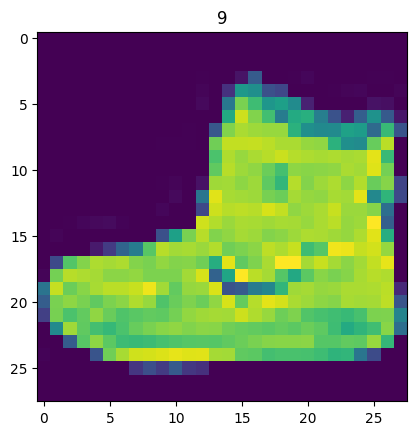

In [ ]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze()) # image shape is [1, 28, 28] (colour channels, height, width)
plt.title(label);


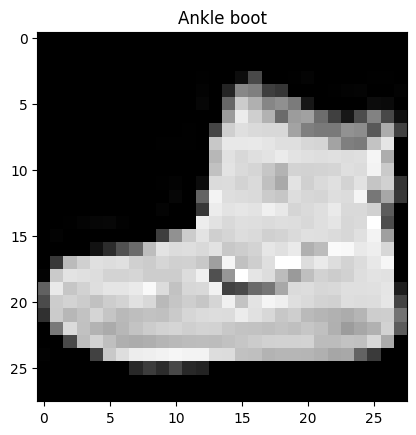

In [ ]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);

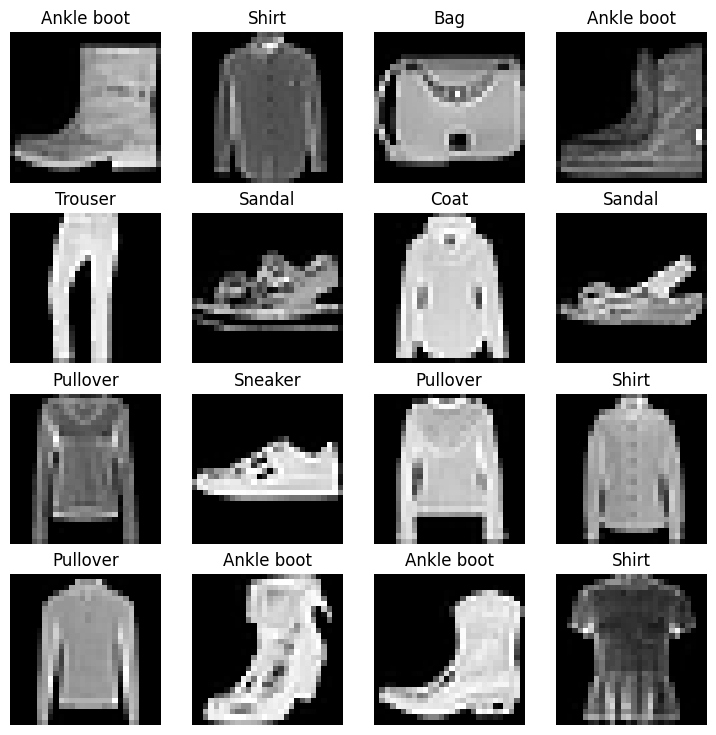

In [ ]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);

In essence, taking pixel values and building a model to find patterns in them to use on future pixel values.

### Prepare DataLoader
( https://pytorch.org/tutorials/beginner/basics/data_tutorial.html )

The data loader helps load the data into the model

It turns a large Dataset into a Python iterable of smaller chunks.

These smaller chunks are called batches or mini-batches and can be set by the batch_size parameter.

In [ ]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(train_data, # dataset to turn into iterable
    batch_size=BATCH_SIZE, # how many samples per batch?
    shuffle=True # shuffle data every epoch?
)

test_dataloader = DataLoader(test_data,
    batch_size=BATCH_SIZE,
    shuffle=False # don't necessarily have to shuffle the testing data
)

# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7e9439343cd0>, <torch.utils.data.dataloader.DataLoader object at 0x7e943934cc10>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [ ]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

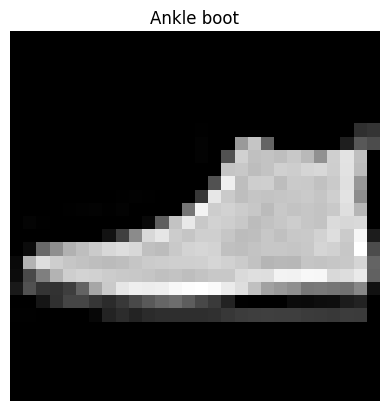

In [ ]:
### TODO ### Retrieve the 100th image in the data using next(iter())
# HINT: First iterate to the batch the image is present in and then retrieve it using its index within that batch
# Also need to set the torch seed to a constant value since our dataloader is shuffle enabled
# Retrieve batch 3 (fourth batch)
torch.cuda.manual_seed(42)
torch.manual_seed(42)
batch_iterator = iter(train_dataloader)
for _ in range(3):  # Skip first 3 batches
    next(batch_iterator)
train_features_batch, train_labels_batch = next(batch_iterator)  # Get batch 3

# Extract the 100th image (index 3 in batch 3)
image = train_features_batch[3].squeeze()
label = train_labels_batch[3]  # Convert tensor to integer

# Display the image
plt.imshow(image, cmap="gray")
plt.title(class_names[label])
plt.axis("off")
plt.show()


<details>

```
# Retrieve batch 3 (fourth batch)
torch.cuda.manual_seed(42)
torch.manual_seed(42)
batch_iterator = iter(train_dataloader)
for _ in range(3):  # Skip first 3 batches
    next(batch_iterator)
train_features_batch, train_labels_batch = next(batch_iterator)  # Get batch 3

# Extract the 100th image (index 3 in batch 3)
image = train_features_batch[3].squeeze()
label = train_labels_batch[3]  # Convert tensor to integer

# Display the image
plt.imshow(image, cmap="gray")
plt.title(class_names[label])
plt.axis("off")
plt.show()
```
<summary>Show Answer</summary>

### We will begin by building a baseline model

In [ ]:
# Create a flatten layer
flatten_model = nn.Flatten() # all nn modules function as a model (can do a forward pass)

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # perform forward pass

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")


Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


Why do this?

Because we've now turned our pixel data from height and width dimensions into one long feature vector.

Let's create our first model using nn.Flatten() as the first layer.

| **Layer**       | **Description**                     | **Output Shape**    |
|-----------------|-------------------------------------|---------------------|
| **Input Image** | Grayscale image                    | `1×28×28`           |
| **Flatten**     | Converts image to 1D vector        | `784`               |
| **Linear(FC1)** | Fully connected layer (hidden units) | `10`          |
| **Linear(FC2)** | Fully connected layer (output classes) | `10`          |




In [ ]:
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # neural networks like their inputs in vector form
            nn.Linear(in_features=input_shape, out_features=hidden_units), # in_features = number of features in a data sample (784 pixels)
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)

Next, we will instantiate the model

In [ ]:
torch.manual_seed(42)

# Need to setup model with input parameters
model_0 = FashionMNISTModelV0(input_shape=784, # one for every pixel (28x28)
    hidden_units=10, # how many units in the hidden layer
    output_shape=len(class_names) # one for every class
)
model_0.to(device)

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

We setup the loss, optimizer and evaluation metrics

In [ ]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss() # this is also called "criterion"/"cost function" in some places
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

We will now create a training loop d train the model on bathces of data. The steps are :

1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss per batch.
4. Loop through testing batches, perform testing steps, calculate the test loss per batch.
5. Print out what's happening.


In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")


<details>

```
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")
```
<summary>Show Answer</summary>

In [ ]:
from tqdm.auto import tqdm
torch.manual_seed(42)

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader,
        model=model_0,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn
    )
    test_step(data_loader=test_dataloader,
        model=model_0,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn
    )

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.59039 | Train accuracy: 79.17%
Test loss: 0.50954 | Test accuracy: 82.04%

Epoch: 1
---------
Train loss: 0.47633 | Train accuracy: 83.32%
Test loss: 0.47989 | Test accuracy: 83.20%

Epoch: 2
---------
Train loss: 0.45503 | Train accuracy: 84.05%
Test loss: 0.47664 | Test accuracy: 83.43%



In [ ]:
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    """Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    device = next(model.parameters()).device
    with torch.inference_mode():
        for X, y in data_loader:
            # Make predictions with the model
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                                y_pred=y_pred.argmax(dim=1)) # For accuracy, need the prediction labels (logits -> pred_prob -> pred_labels)

        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}


In [ ]:
# Calling the eval_model function
torch.manual_seed(42)
model_0_results = eval_model(model=model_0,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn)
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

# Building the model with non-linearity - table representation

| **Layer**       | **Description**                     | **Output Shape**    |
|-----------------|-------------------------------------|---------------------|
| **Input Image** | Grayscale image                    | `1×28×28`           |
| **Flatten**     | Converts image to 1D vector        | `784`               |
| **Linear(FC1)** | Fully connected layer (hidden units) | `10`          |
| **ReLU**        | Activation function (element-wise)    | `10`           |
| **Linear(FC2)** | Fully connected layer (output classes) | `10`          |
| **ReLU**        | Activation function (element-wise)    | `10`           |

In [ ]:
# Create a model with non-linear and linear layers
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        ### TODO ### Define self.layer_stack by introducing by introducing ReLu
        # activation functions in between 2 linear layers
        self.layer_stack = nn.Sequential(
                    nn.Flatten(), # flatten inputs into single vector
                    nn.Linear(in_features=input_shape, out_features=hidden_units),
                    nn.ReLU(),
                    nn.Linear(in_features=hidden_units, out_features=output_shape),
                    nn.ReLU()
                )

    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)


<details>

```
self.layer_stack = nn.Sequential(
            nn.Flatten(), # flatten inputs into single vector
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )
```
<summary>Show Answer</summary>


In [ ]:
### TODO ### Instantiate the model
model_1 = FashionMNISTModelV1(input_shape=784, # number of input features
    hidden_units=10,
    output_shape=len(class_names) # number of output classes desired
).to(device) # send model to GPU if it's available
next(model_1.parameters()).device # check model device

device(type='cuda', index=0)


<details>

```
model_1 = FashionMNISTModelV1(input_shape=784, # number of input features
    hidden_units=10,
    output_shape=len(class_names) # number of output classes desired
).to(device) # send model to GPU if it's available
next(model_1.parameters()).device # check model device
```
<summary>Show Answer</summary>

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [ ]:
torch.manual_seed(42)

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn
    )
    test_step(data_loader=test_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn
    )

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.98248 | Train accuracy: 65.06%
Test loss: 0.76060 | Test accuracy: 72.80%

Epoch: 1
---------
Train loss: 0.70366 | Train accuracy: 74.48%
Test loss: 0.71731 | Test accuracy: 73.67%

Epoch: 2
---------
Train loss: 0.67375 | Train accuracy: 75.31%
Test loss: 0.69170 | Test accuracy: 74.81%



In [ ]:
 ### TODO ### Call the model_eval funtion and compare the results


<details>

```
torch.manual_seed(42)
model_1_results = eval_model(model=model_1,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn)
model_1_results
```
<summary>Show Answer</summary>

In this case, it looks like adding non-linearities to our model made it perform worse than the baseline.

From the looks of things, it seems like our model is overfitting on the training data.

# 3. Convolutional Neural Networks

##### Some common CNN related layers

Here's a quick overview of frequently used CNN related layers


| Layer Name        | Parameters | Function |
|------------------|------------|-----------|
| `nn.Conv1d` | `(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros')` | Applies a 1D convolution over an input signal (e.g., time-series, audio). |
| `nn.Conv2d` | `(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros')` | Applies a 2D convolution over an input image. |
| `nn.MaxPool1d` | `(kernel_size, stride=None, padding=0, dilation=1, return_indices=False, ceil_mode=False)` | Performs 1D max pooling, reducing the feature map size. |
| `nn.MaxPool2d` | `(kernel_size, stride=None, padding=0, dilation=1, return_indices=False, ceil_mode=False)` | Performs 2D max pooling to downsample spatial dimensions. |
| `nn.AvgPool1d` | `(kernel_size, stride=None, padding=0, ceil_mode=False, count_include_pad=True, divisor_override=None)` | Applies 1D average pooling for smoothing feature maps. |
| `nn.AvgPool2d` | `(kernel_size, stride=None, padding=0, ceil_mode=False, count_include_pad=True, divisor_override=None)` | Applies 2D average pooling, reducing dimensions while preserving information. |
| `nn.ReLU` | `()` | Applies the ReLU activation function, setting negative values to zero. |
| `nn.Softmax` | `(dim)` | Applies the softmax function to normalize outputs into probability values. |
| `nn.BatchNorm1d` | `(num_features, eps=1e-5, momentum=0.1, affine=True, track_running_stats=True)` | Performs batch normalization over 1D features (e.g., after `Conv1d`). |
| `nn.BatchNorm2d` | `(num_features, eps=1e-5, momentum=0.1, affine=True, track_running_stats=True)` | Performs batch normalization over 2D feature maps (e.g., after `Conv2d`). |
| `nn.Dropout` | `(p=0.5, inplace=False)` | Randomly zeroes out elements with probability `p` to prevent overfitting. |



An example `nn.Conv2d()` with various parameters:

- **`in_channels`** *(int)* - Number of channels in the input image.
- **`out_channels`** *(int)* - Number of channels produced by the convolution.
- **`kernel_size`** *(int or tuple)* - Size of the convolving kernel/filter.
- **`stride`** *(int or tuple, optional)* - How big of a step the convolving kernel takes at a time. Default: `1`.
- **`padding`** *(int, tuple, str)* - Padding added to all four sides of input. Default: `0`.


In [ ]:
torch.manual_seed(42)
# Create sample batch of random numbers with same size as image batch
images = torch.randn(size=(32, 3, 64, 64)) # [batch_size, color_channels, height, width]
test_image = images[0] # get a single image for testing
print(f"Image batch shape: {images.shape} -> [batch_size, color_channels, height, width]")
print(f"Single image shape: {test_image.shape} -> [color_channels, height, width]")
print(f"Single image pixel values:\n{test_image}")

Image batch shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Single image shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Single image pixel values:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,

In [ ]:
## TO-DO ##
# Implement a 2D Convolution operation of 3 input channels, 10 output channels
# with a kernel size of 3 with default stride and no padding

conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=1)

# Pass the data through the convolutional layer
conv_layer(test_image).shape

torch.Size([10, 64, 64])

<details>
  <summary>Show Answer</summary>

```python
# Your Python code goes here
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0) # also try using "valid" or "same" here

# Pass the data through the convolutional layer
conv_layer(test_image)


#### Some Pooling Layer Choices:
1. **MaxPooling** → Retains the most important features by selecting the maximum value in each region.  
2. **Average Pooling** → Preserves overall feature distribution by computing the average in each region.


Let's now check what happens when we move our data through nn.MaxPool2D(). CNNs expect a 4D input tensor in the format = (Batch Size, Channels, Height, Width). We'll use unsqueeze(dim = 0) to convert into a 4D tensor of batch size 1

In [ ]:
import torch
import torch.nn as nn

In [ ]:
torch.manual_seed(42)
# Create a random tensor with a similar number of dimensions to our images
random_tensor = torch.randn(size=(1, 1, 2, 2))
print(f"Random tensor:\n{random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")

# Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2) # see what happens when you change the kernel_size value

# Pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n{max_pool_tensor} <- this is the maximum value from random_tensor")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")

Random tensor:
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])

Max pool tensor:
tensor([[[[0.3367]]]]) <- this is the maximum value from random_tensor
Max pool tensor shape: torch.Size([1, 1, 1, 1])


In [ ]:
#### **TO-DO: Create an Average Pooling Layer**
# Set up an **`AvgPool2d`** layer similar to the **MaxPool2d** example and apply on the
# Random Tensor Example.
# Experiment with **different kernel sizes** to observe how it affects the output.
avg_pool_layer = nn.AvgPool2d(kernel_size=2)  # Try changing kernel_size

# Pass the random tensor through the average pooling layer
avg_pool_tensor = avg_pool_layer(random_tensor)

print(f"Random tensor:\n{random_tensor}")
print(f"\nAverage pool tensor:\n{avg_pool_tensor} <- this is the average value from random_tensor")
print(f"Average pool tensor shape: {avg_pool_tensor.shape}")

Random tensor:
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])

Average pool tensor:
tensor([[[[0.2326]]]]) <- this is the average value from random_tensor
Average pool tensor shape: torch.Size([1, 1, 1, 1])


<details>
  <summary>Show Answer</summary>

```python
# Create an average pooling layer
avg_pool_layer = nn.AvgPool2d(kernel_size=2)  # Try changing kernel_size

# Pass the random tensor through the average pooling layer
avg_pool_tensor = avg_pool_layer(random_tensor)

print(f"Random tensor:\n{random_tensor}")
print(f"\nAverage pool tensor:\n{avg_pool_tensor} <- this is the average value from random_tensor")
print(f"Average pool tensor shape: {avg_pool_tensor.shape}")


In [ ]:
# Print out original image shape without and with unsqueezed dimension
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(dim=0).shape}")

# Create a sample nn.MaxPoo2d() layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# Pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 64, 64])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([1, 10, 32, 32])


#### Building CNNs

##### Let's now begin with Builidng a Simple CNN Model

| **Layer**       | **Description**                     | **Output Shape**    |
|-----------------|-------------------------------------|---------------------|
| **Input Image** | Grayscale image                    | `1×28×28`           |
| **Conv1**       | 3×3 kernel, 6 filters              | `6×26×26`           |
| **ReLU**        | Activation function                | `6×26×26`           |
| **MaxPool**     | 2×2 pooling (downsample by 2)      | `6×13×13`           |
| **Flatten**     | Flatten to a 1D vector             | `1014`              |
| **FC1**         | Fully connected layer (10 neurons) | `10` (output classes) |



In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        # Convolutional layer: 1 input channel (grayscale), 6 output channels, 3x3 kernel
        self.conv1 = nn.Conv2d(1, 6, kernel_size=3)  # Input: 1×28×28 → Output: 6×26×26
        self.relu1 = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)  # Downsample by 2
        # Fully connected layer
        self.fc1 = nn.Linear(6 * 13 * 13, 10)  # Output: 10 classes (FashionMNIST categories)

    def forward(self, x):
        # Conv → ReLU → Pool
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool(x)

        # Flatten
        x = torch.flatten(x, start_dim=1)

        # Fully connected layer (output)
        x = self.fc1(x)
        return x


# Instantiate the model
net = SimpleCNN()

# Print model summary
print(net)


SimpleCNN(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (relu1): ReLU()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1014, out_features=10, bias=True)
)


In [ ]:
##Initiliazing the Loss function and Optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=net.parameters(),
                            lr=0.1)

In [ ]:
from tqdm.auto import tqdm

torch.manual_seed(42)
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader,
        model=net,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn
    )
    test_step(data_loader=test_dataloader,
        model=net,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn
    )

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.51952 | Train accuracy: 81.77%
Test loss: 0.38784 | Test accuracy: 86.42%

Epoch: 1
---------
Train loss: 0.36438 | Train accuracy: 87.05%
Test loss: 0.36576 | Test accuracy: 87.15%

Epoch: 2
---------
Train loss: 0.33804 | Train accuracy: 88.00%
Test loss: 0.35262 | Test accuracy: 87.84%



In [ ]:
torch.manual_seed(42)


# Calculate model 0 results on test dataset
simple_net_results = eval_model(model=net, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn
)
simple_net_results

{'model_name': 'SimpleCNN',
 'model_loss': 0.35261887311935425,
 'model_acc': 87.83945686900958}

We see that our simple CNN still performs better than the previous FC Layered model because **CNNs effectively capture spatial hierarchies, reduce redundant parameters, and focus on important features through convolution and pooling operations.

| **Layer**       | **Description**                     | **Output Shape**    |
|-----------------|-------------------------------------|---------------------|
| **Input Image** | Grayscale image                    | `1×28×28`           |
| **Conv1**       | 3×3 kernel, 6 filters              | `6×26×26`           |
| **ReLU**        | Activation function                | `6×26×26`           |
| **MaxPool1**    | 2×2 pooling (downsample by 2)      | `6×13×13`           |
| **Conv2**       | 3×3 kernel, 16 filters             | `16×11×11`          |
| **ReLU**        | Activation function                | `16×11×11`          |
| **MaxPool2**    | 2×2 pooling (downsample by 2)      | `16×5×5`            |
| **Flatten**     | Flatten to a 1D vector             | `400`               |
| **FC1**         | Fully connected layer (64 neurons) | `64`                |
| **ReLU**        | Activation function                | `64`                |
| **FC2**         | Fully connected layer (10 neurons) | `10` (output classes) |


##### TODO Implement your own CNN

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class BetterCNN(nn.Module):
    def __init__(self):
        super(BetterCNN, self).__init__()
        # Convolutional layer 1: 1 input channel (grayscale), 6 output channels, 3x3 kernel
        self.conv1 = nn.Conv2d(1, 6, kernel_size=3)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Convolutional layer 2: 6 input channels, 16 output channels, 3x3 kernel
        self.conv2 = nn.Conv2d(6, 16, kernel_size=3)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Fully connected layers
        self.fc1 = nn.Linear(16 * 5 * 5, 64)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)

        x = torch.flatten(x, start_dim=1)

        x = self.fc1(x)
        x = self.relu3(x)

        x = self.fc2(x)
        return x


# Instantiate the model
better_net = BetterCNN()

# Print model summary
print(better_net)


BetterCNN(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=400, out_features=64, bias=True)
  (relu3): ReLU()
  (fc2): Linear(in_features=64, out_features=10, bias=True)
)


<details>
  <summary>Show Answer</summary>

```python
import torch
import torch.nn as nn
import torch.nn.functional as F

class BetterCNN(nn.Module):
    def __init__(self):
        super(BetterCNN, self).__init__()
        # Convolutional layer 1: 1 input channel (grayscale), 6 output channels, 3x3 kernel
        self.conv1 = nn.Conv2d(1, 6, kernel_size=3)  
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Convolutional layer 2: 6 input channels, 16 output channels, 3x3 kernel
        self.conv2 = nn.Conv2d(6, 16, kernel_size=3)  
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Fully connected layers
        self.fc1 = nn.Linear(16 * 5 * 5, 64)  
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(64, 10)  

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)

        x = torch.flatten(x, start_dim=1)

        x = self.fc1(x)
        x = self.relu3(x)

        x = self.fc2(x)
        return x


# Instantiate the model
better_net = BetterCNN()

# Print model summary
print(better_net)


https://pytorch.org/docs/stable/optim.html


In [ ]:
### TODO ### Experiment with different optimizers and learning rates (Optional also try out other parameters
# that you can find from the documentation)
# Experiment with LR Values between 0.01 to 0.3
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=better_net.parameters(), lr=0.2)

<details>
  <summary>Show Answer</summary>

```python
optimizer = torch.optim.SGD(params=better_net.parameters(), lr=0.2)


In [ ]:
from tqdm.auto import tqdm

torch.manual_seed(42)
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader,
        model=better_net,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn
    )
    test_step(data_loader=test_dataloader,
        model=better_net,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn
    )

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.59962 | Train accuracy: 77.22%
Test loss: 0.43373 | Test accuracy: 84.02%

Epoch: 1
---------
Train loss: 0.38142 | Train accuracy: 85.88%
Test loss: 0.38044 | Test accuracy: 86.61%

Epoch: 2
---------
Train loss: 0.33930 | Train accuracy: 87.38%
Test loss: 0.36142 | Test accuracy: 86.86%



In [ ]:
torch.manual_seed(42)

# Calculate model 0 results on test dataset
better_net_results = eval_model(model=better_net, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn
)
better_net_results

{'model_name': 'BetterCNN',
 'model_loss': 0.3614185154438019,
 'model_acc': 86.86102236421725}

Since our dataset is simple enough adding more layers does not produce any substantial improvements

# 4. Recurrent Neural Networks

Let's now explore RNN implementation and use cases with a simple Time Series Forecasting of a Sine Wave

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
# Generate synthetic sine wave data

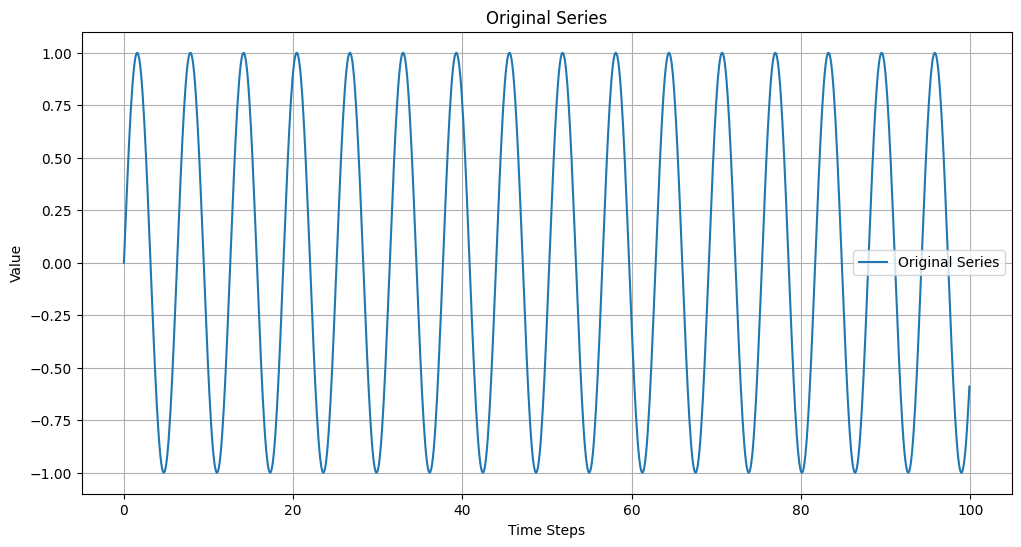

In [ ]:
time = np.arange(0, 100, 0.1)
sine = np.sin(time)

plt.figure(figsize=(12, 6))
plt.plot(time, sine, label='Original Series')
plt.title('Original Series')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

Let's now process this data using the Sliding Window method to make it suitable for RNN processing

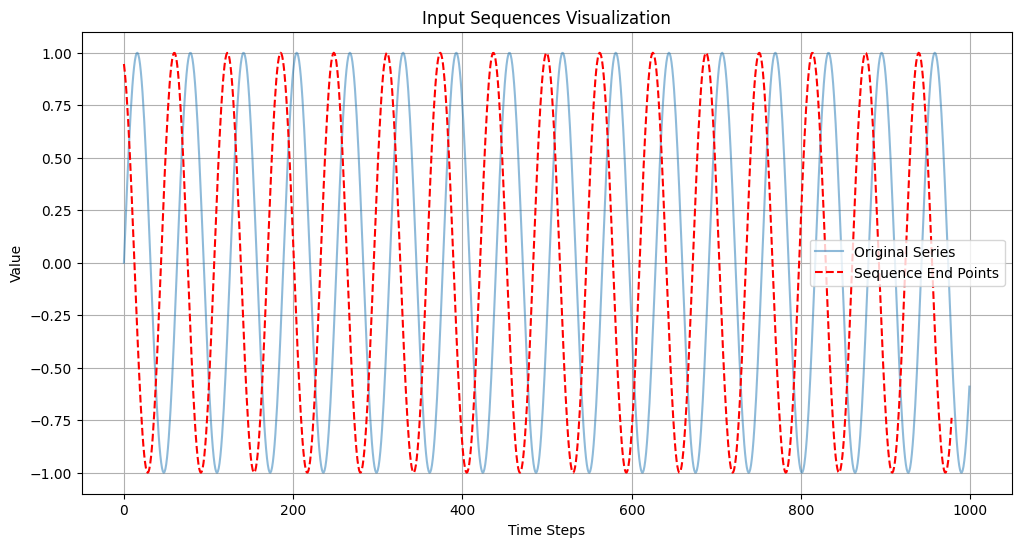

In [ ]:
# Convert to PyTorch tensor
data = torch.FloatTensor(sine).view(-1, 1)

# Create sliding window sequences as a data preparation step
def create_sequences(data, seq_length):
    seq = []
    labels = []
    for i in range(len(data)-seq_length-1):
        seq.append(data[i:i+seq_length])
        labels.append(data[i+1:i+seq_length+1])
    return torch.stack(seq), torch.stack(labels)

SEQ_LENGTH = 20
X, y = create_sequences(data, SEQ_LENGTH)

plt.figure(figsize=(12, 6))
plt.plot(data.numpy(), alpha=0.5, label='Original Series')
plt.plot(X.numpy()[:, -1, 0], 'r--', label='Sequence End Points')
plt.title('Input Sequences Visualization')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

Original Series : Sine Wave Generated for the Time Series Task

Sequence End Points (Red Dashed Line) : Points represent the last values of each input sequence created using the sliding window approach. This splits the continous time series into smaller overlapping sequences of fixed length. Each Sequence Length represents a segment of the time series used as input for the RNN.

##### Some Layers used in Building RNNs

| Layer/Function Name | Parameters                                                                                     | Function                                                                                           |
|---------------------|-----------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------|
| `nn.RNN`            | `(input_size, hidden_size, num_layers=1, nonlinearity='tanh', batch_first=False, dropout=0)`  | A basic RNN layer. Supports `tanh` or `relu` activations.                                         |
| `nn.LSTM`           | `(input_size, hidden_size, num_layers=1, batch_first=False, dropout=0)`                       | LSTM layer for learning long-term dependencies in sequential data.                                |
| `nn.GRU`            | `(input_size, hidden_size, num_layers=1, batch_first=False, dropout=0)`                       | GRU layer for efficient sequence modeling with fewer parameters than LSTM.                        |
| `nn.Linear`         | `(in_features, out_features, bias=True)`                                                      | Fully connected layer to map RNN outputs to desired dimensions.                                   |
| `nn.Tanh`           | `()`                                                                                          | Applies the hyperbolic tangent activation function to squash outputs between -1 and 1.            |
| `nn.ReLU`           | `()`                                                                                          | Applies the ReLU activation function to set negative values to zero.                              |
| `nn.Sigmoid`        | `()`                                                                                          | Applies the sigmoid activation function to squash outputs between 0 and 1.                        |
| `nn.Dropout`        | `(p=0.5)`                                                                                     | Randomly zeroes out elements with probability `p` to prevent overfitting.                         |
| `nn.BatchNorm1d`    | `(num_features)`                                                                              | Normalizes 1D inputs (e.g., RNN hidden states) to stabilize training.                             |
| `nn.Softmax`        | `(dim)`                                                                                       | Converts outputs into probabilities by normalizing across a specified dimension.                  |


An example `nn.RNN()` with various parameters:

- **`input_size`** *(int)* - Number of features in the input at each time step.
- **`hidden_size`** *(int)* - Number of hidden units in the recurrent layer.
- **`num_layers`** *(int, optional)* - Number of stacked RNN layers. Default: `1`.
- **`batch_first`** *(bool, optional)* - If `True`, input shape should be `(batch, seq_len, input_size)`. Default: `False`.
- **`dropout`** *(float, optional)* - Dropout probability for regularization. Applied when `num_layers > 1`. Default: `0`.
- **`bidirectional`** *(bool, optional)* - If `True`, uses a bidirectional RNN. Default: `False`.


nn.RNN(x) returns output and hidden_state

##### TO DO : Define the RNN Architecture and Forward Function based on the table given below


| **Layer**        | **Description**                                        | **Output Shape**        |
|------------------|--------------------------------------------------------|-------------------------|
| **Input Data**   | Time series input data (batch_first)                   | `(batch, seq_len, 1)`   |
| **RNN Layer**    | Simple RNN with `hidden_size=32`                       | `(batch, seq_len, 32)`  |
| **Linear Layer** | Maps each hidden state (32) to `output_size=1`         | `(batch, seq_len, 1)`   |
| **Output**       | Final predictions for each time step                   | `(batch, seq_len, 1)`   |



Hint : Use batch_first = True. The seq_length parameter is infered dynammically from the input tensor's shape so no need so specify it when batch_first = True

nn.RNN(x) returns output and hidden_state

In [ ]:
class RNNTimeSeries(torch.nn.Module):
    def __init__(self, input_size=1, hidden_size=32, output_size=1):
        super().__init__()
        self.rnn = torch.nn.RNN(
            input_size=input_size,
            hidden_size=hidden_size,
            batch_first=True
        )
        self.linear = torch.nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.rnn(x)  # out shape: (batch, seq_len, hidden_size)
        pred = self.linear(out)
        return pred

<details>
<summary> Show Answer </summary>



```python
class RNNTimeSeries(torch.nn.Module):
    def __init__(self, input_size=1, hidden_size=32, output_size=1):
        super().__init__()
        self.rnn = torch.nn.RNN(
            input_size=input_size,
            hidden_size=hidden_size,
            batch_first=True
        )
        self.linear = torch.nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.rnn(x)  # out shape: (batch, seq_len, hidden_size)
        pred = self.linear(out)
        return pred
```



In [ ]:
# Split data
train_size = int(0.8 * len(X))
train_X, test_X = X[:train_size], X[train_size:]
train_y, test_y = y[:train_size], y[train_size:]

# Initialize model and optimizer
model_1 = RNNTimeSeries()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model_1.parameters(), lr=0.001)

In [ ]:
EPOCHS = 100
BATCH_SIZE = 32

def rnn_train_loop(model,EPOCHS, BATCH_SIZE):
  for epoch in range(EPOCHS):
      model.train()
      epoch_loss = 0.0  # Accumulate loss for the epoch
      for i in range(0, len(train_X), BATCH_SIZE):
          batch_X = train_X[i:i+BATCH_SIZE]
          batch_y = train_y[i:i+BATCH_SIZE]

          # Forward pass
          outputs = model(batch_X) #Train Loop ToDo
          loss = criterion(outputs, batch_y)

          # Backward pass and optimization
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()

          epoch_loss += loss.item()  # Add batch loss to epoch loss

      # Calculate mean squared error (MSE) for the epoch
      model.eval()
      with torch.no_grad():
          train_pred = model(train_X)
          mse = torch.mean((train_pred - train_y) ** 2).item()

      # Print loss and MSE every 10 epochs
      if (epoch + 1) % 10 == 0:
          print(f"Epoch [{epoch + 1}/{EPOCHS}], Loss: {epoch_loss:.4f}, MSE: {mse:.4f}")


<details>
<summary> Show Answer </summary>



```python
EPOCHS = 100
BATCH_SIZE = 32

def rnn_train_loop(model,EPOCHS, BATCH_SIZE):
  for epoch in range(EPOCHS):
      model.train()
      epoch_loss = 0.0  # Accumulate loss for the epoch
      for i in range(0, len(train_X), BATCH_SIZE):
          batch_X = train_X[i:i+BATCH_SIZE]
          batch_y = train_y[i:i+BATCH_SIZE]

          # Forward pass
          outputs = model(batch_X) #Train Loop ToDo
          loss = criterion(outputs, batch_y)

          # Backward pass and optimization
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()

          epoch_loss += loss.item()  # Add batch loss to epoch loss

      # Calculate mean squared error (MSE) for the epoch
      model.eval()
      with torch.no_grad():
          train_pred = model(train_X)
          mse = torch.mean((train_pred - train_y) ** 2).item()

      # Print loss and MSE every 10 epochs
      if (epoch + 1) % 10 == 0:
          print(f"Epoch [{epoch + 1}/{EPOCHS}], Loss: {epoch_loss:.4f}, MSE: {mse:.4f}")
```



In [ ]:
rnn_train_loop(model_1,EPOCHS,BATCH_SIZE)

Epoch [10/100], Loss: 0.4127, MSE: 0.0155
Epoch [20/100], Loss: 0.1785, MSE: 0.0068
Epoch [30/100], Loss: 0.0881, MSE: 0.0033
Epoch [40/100], Loss: 0.0608, MSE: 0.0023
Epoch [50/100], Loss: 0.0573, MSE: 0.0022
Epoch [60/100], Loss: 0.0562, MSE: 0.0022
Epoch [70/100], Loss: 0.0548, MSE: 0.0021
Epoch [80/100], Loss: 0.0530, MSE: 0.0021
Epoch [90/100], Loss: 0.0504, MSE: 0.0019
Epoch [100/100], Loss: 0.0472, MSE: 0.0018


Test MSE: 0.0425


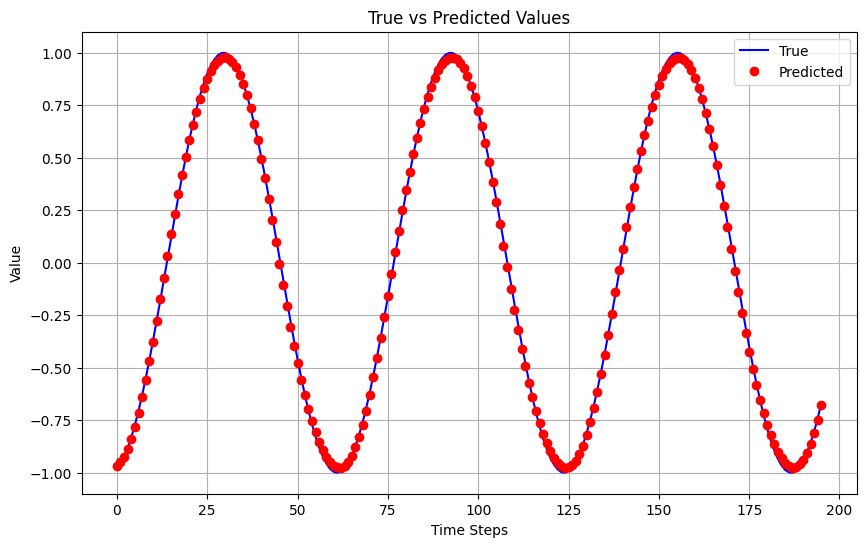

In [ ]:
# Evaluate the model
model_1.eval()
with torch.no_grad():
    test_pred = model_1(test_X)

# Calculate RMSE
test_loss = torch.sqrt(criterion(test_pred, test_y))
print(f"Test MSE: {test_loss.item():.4f}")

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(test_y.numpy()[:, -1, 0], label='True', color='blue')  # True values in blue
plt.plot(test_pred.numpy()[:, -1, 0], 'ro', label='Predicted')  # Predicted values as dotted red line
plt.title('True vs Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()